In [ ]:
using MarketData, Dates, Plots, Distributions, NonparametricRegression

getQuotes(stock, dias=260) = yahoo(stock, YahooOpt(period1 = now() - Day(dias) )).AdjClose

In [28]:
stock = "GOAU4.SA"
s = getQuotes(stock) |> values |> skipmissing |> collect

178-element Vector{Float64}:
 10.355445
 10.70125
 11.0564
 10.822749
 10.653055
 10.935879
 11.284697
 11.265841
 10.86046
 10.539926
 10.615345
 11.199849
 11.454391
  ⋮
 11.49
 11.13
 11.25
 11.31
 11.2
 11.75
 11.53
 11.9
 12.22
 12.19
 13.18
 13.27

Moda do preço: 10.653055
Sobe


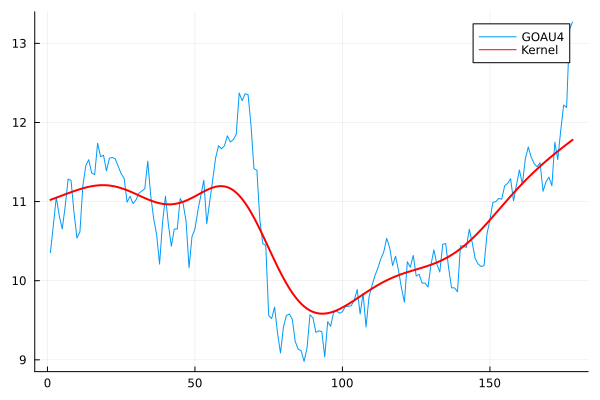

In [29]:
# Ajuste da série histórica dos preços
mode(s) |> string |> x -> println("Moda do preço: $x")

k = npregress(1:length(s), s, hLB=11)

if k[end-2] < k[end-1] > k[end]
    println("Cai, virou topo")
elseif k[end-2] > k[end-1] < k[end]
    println("Sobe, virou fundo")
elseif k[end-1] < k[end]
    println("Sobe")
else
    println("Cai")
end
plot(s, label = replace(stock, ".SA" => ""))
plot!(k, color=:red, lw=2, label="Kernel")
#savefig("serie-kernel.png")

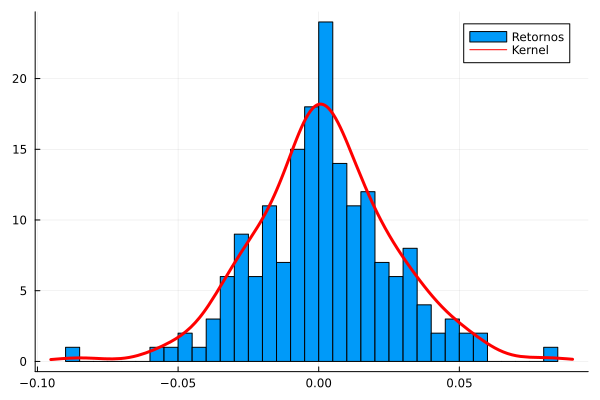

In [30]:
# Análise da dispersão dos retornos diários
retornos = (s[2:end] - s[1:end-1]) ./ s[1:end-1]
histogram(retornos, bins=50, label="Retornos")

# Ajusta o histograma a uma distribuição Kernel Normal
n = length(retornos)
Sigma = std(retornos)
h = 1.06 * Sigma / n^(1/5) 
K(x) = exp(-x^2 / 2) / sqrt(2pi)
Kh(x) = K(x/h) / h
f(x) = sum( Kh(x-xi) for xi in retornos) / n
plot!(f, c=:red, lw=3, label="Kernel")
#savefig("histo-retornos-kernel.png")